# Imports

In [2]:
import pandas as pd
import numpy as np
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
import os
import regex as re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


In [8]:
!pip install contractions
import contractions
import unicodedata
!pip install langdetect
from langdetect import detect
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns

You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\DELL\anaconda6\python.exe -m pip install --upgrade pip' command.


# Reading the data into df

In [9]:
#Reading the excel into data frame
df = pd.read_excel('Data file.xlsx')
df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


# To Check unique Assignment Group

In [10]:
#checking number of assignment groups
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

There are total 74 groups

Assignment Group Percentage

In [11]:
df_inc = df['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


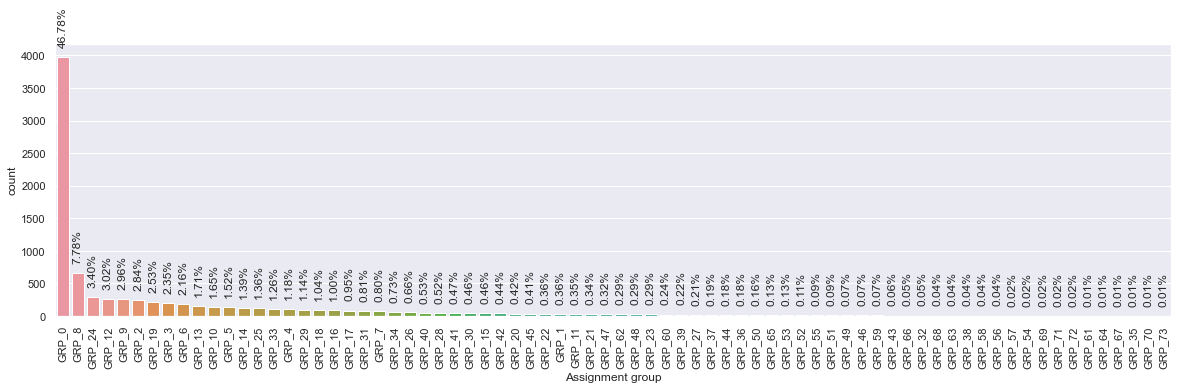

In [12]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df, order=df["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')
#augmentation

Checking the most repeated top 10 groups

In [13]:
df_top_10 = df['Assignment group'].value_counts().nlargest(10).reset_index()
df_top_10

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


Checking the last 10 assignment groups

In [14]:
df_bottom_10 = df['Assignment group'].value_counts().nsmallest(10).reset_index()
df_bottom_10

,index,Assignment group
0,GRP_61,1
1,GRP_64,1
2,GRP_67,1
3,GRP_35,1
4,GRP_70,1
5,GRP_73,1
6,GRP_57,2
7,GRP_54,2
8,GRP_69,2
9,GRP_71,2


Checking the distirbution

In [15]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
_1_50_ticket = {'Description':' 1-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([_1_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins


,Description,Ticket Count
0,1-50 ticket,44
1,51-100 ticket,9
2,>100 ticket,15


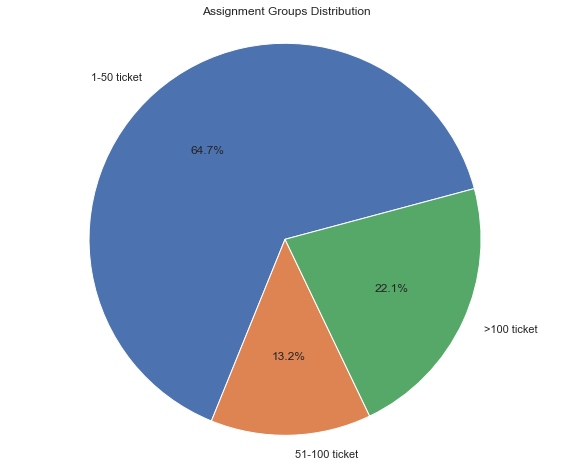

In [16]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [11]:
#checking the null values
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [17]:
#Checking the value of null
df[df['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [18]:
#Replacing the null value with the short description value
df=df.replace({'Description':np.NaN},df[df['Short description']=='i am locked out of skype']['Short description'].to_string().split(maxsplit=1)[1])

In [19]:
#Checking if the value is actually replaced or not
df.iloc[4395]

Short description    i am locked out of skype
Description          i am locked out of skype
Caller                      viyglzfo ajtfzpkb
Assignment group                        GRP_0
Name: 4395, dtype: object

In [20]:
#Checking for the null values
df.isnull().sum()

Short description    8
Description          0
Caller               0
Assignment group     0
dtype: int64

Since we are mostly concerend with the description letting the short description null values be for  a moment

In [21]:
feature_df = df.filter(['Description','Assignment group'], axis=1)

In [22]:
#caluclating the word count
feature_df['word_count']=df['Description'].apply(lambda x:len(str(x).split()))
#printing 5 sample values
feature_df.sample(15)

,Description,Assignment group,word_count
2233,system is slowing down while processing shipme...,GRP_18,89
8493,"i am sorry, i have another two accounts that n...",GRP_10,48
2890,\n\nreceived from: jxgobwrm.qkugdipo@gmail.com...,GRP_0,36
2140,unable to view subject option in outlook,GRP_0,7
4820,lauacyltoe hxgaycze java to be installed,GRP_0,6
4578,zeiterfassung funktioniert nicht \we_qs \quali...,GRP_24,7
3236,"hallo liebe kollegen,_x000D_\n_x000D_\nwarum h...",GRP_0,26
3874,could you reset my company mobile phone. detai...,GRP_0,46
2707,india:high latency/packet drops,GRP_8,3
7536,\n\nreceived from: crkdjbot.qiztrxne@gmail.com...,GRP_0,58


In [23]:
# Displaying the row with Maximum word counts
feature_df[feature_df['word_count']==feature_df['word_count'].max()]


,Description,Assignment group,word_count
7345,we are seeing activity indicating the host at ...,GRP_2,1657


In [24]:
# Dispalying rows with minimum word count
feature_df[feature_df['word_count']==feature_df['word_count'].min()]

,Description,Assignment group,word_count
276,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...,GRP_30,1
415,complete,GRP_17,1
416,completed,GRP_0,1
608,funktionsstÃ¶rung,GRP_33,1
618,æ‰“å¼€outlookæ—¶ï¼Œæ˜¾ç¤ºoutlook.ostæ–‡ä»¶é”™è...,GRP_0,1
...,...,...,...
8059,the,GRP_17,1
8092,the,GRP_17,1
8093,the,GRP_17,1
8168,the,GRP_17,1


In [25]:
#Method to caluclate no of characters available in sentence
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)


In [26]:
feature_df['char_counts']=df['Description'].apply(lambda x: char_counts(str(x)))
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts
5809,email delegation,GRP_0,2,15
4561,zcor0003; variants plant_271 and rodstock not ...,GRP_44,9,52
303,request to reset microsoft online services pas...,GRP_0,9,75
1322,received from: monitoring_tool@company.com_x00...,GRP_8,12,119
4460,bitte fÃ¼r oben genannten ordner schreib- und ...,GRP_34,16,102


In [27]:
#Checking the minimum character count
feature_df['char_counts'].min()

1

In [28]:
#Checking the maximum character count
feature_df['char_counts'].max()

12785

In [29]:
#Caluclating the average word count
feature_df['Avg_word_Count']=feature_df['word_count']/feature_df['char_counts']
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count
2880,to correct attached listed errors,GRP_10,5,29,0.172414
7962,received from: monitoring_tool@company.com_x00...,GRP_8,12,108,0.111111
6653,name:wnorzsyv mdflqwxg\nlanguage:\nbrowser:mic...,GRP_0,38,296,0.128378
4133,unable to login to engineering tool,GRP_0,6,30,0.200000
7096,printer not working,GRP_0,3,17,0.176471


In [30]:
#Checking the minimum avg word count
print("Minimum avg word count",feature_df['Avg_word_Count'].min())
print("Maximum avg word count",feature_df['Avg_word_Count'].max())

Minimum avg word count 0.009900990099009901
Maximum avg word count 1.0


In [31]:
import json
import re
import string
import nltk
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from string import punctuation
#from wordcloud import WordCloud
#from wordcloud import WordCloud, STOPWORDS

In [32]:
print(stop_words)
len(stop_words)

{'became', 'name', 'those', 'moreover', 'also', 'please', 'whole', 'same', 'about', 'was', 'off', 'themselves', 'eight', 'has', 'indeed', 'else', 'meanwhile', 'someone', 'wherever', 'using', 'his', 'although', 'another', '’re', 'others', 'front', 'fifteen', 'after', 'some', 'seemed', 'onto', 'would', 'therein', 'a', 'this', 'during', 'whence', '’ll', 'because', 'without', 'which', 'get', 'very', 'amongst', 'ca', 'first', 'than', 'mostly', 'none', 'three', 'thru', 'itself', '‘ll', 'whither', 'if', 'how', 'formerly', 'yours', 'thereafter', 'back', 'around', 'thence', 'will', 'herself', 'as', 'doing', 'into', 'these', 'latter', 'i', 'anything', 'me', 'everything', 'my', 'sixty', 'anyhow', 'besides', 'throughout', 'when', 'yourself', 'other', 'anywhere', 'but', 'call', 'whoever', 'n’t', 'at', 'less', 'empty', 'us', "'ve", 'already', 'against', 'there', 'within', 'yet', 'neither', 'two', 'have', 'perhaps', 'an', 'himself', 'once', 'forty', 'thereby', 'towards', 'nevertheless', 'every', 'the

326

In [33]:
#caluclating the number of stop words in description column
feature_df['stop_words_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t in stop_words]))
#printing the sample values
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count
6181,outlook is not opening,GRP_27,4,19,0.210526,2
4262,cant connect to erp : vpn issue,GRP_0,7,25,0.280000,1
3872,HostName_894 : volume: c:\ label:sys-HostName_...,GRP_39,15,95,0.157895,2
413,cannot print from windows with new pc i was ju...,GRP_3,11,45,0.244444,6
5,unable to log in to engineering tool and skype,GRP_0,9,38,0.236842,4


In [34]:
#caluclating the minimum number of stop words count
print("Minimum number of stop words present",feature_df['stop_words_count'].min())
#caluclating the maximum number of stop words count
print("Maximum number of stop words present", feature_df['stop_words_count'].max())

Minimum number of stop words present 0
Maximum number of stop words present 352


In [35]:
#caluclating the number of digits count in description column
feature_df['Digits_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
#Printing the sample rows
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count
6398,\n\nreceived from: crkdjbot.qiztrxne@gmail.com...,GRP_0,23,240,0.095833,7,0
4826,received from: monitoring_tool@company.com_x00...,GRP_6,12,107,0.112150,1,0
4102,received from: monitoring_tool@company.com_x00...,GRP_8,12,106,0.113208,1,0
2077,i have recently upgraded our calendar / outloo...,GRP_22,99,459,0.215686,50,0
6420,"hello,_x000D_\n_x000D_\nplease reset password ...",GRP_7,29,174,0.166667,14,0


In [40]:
s = feature_df['Digits_count'].groupby(feature_df['Assignment group']).value_counts()

In [37]:
#Checking the maximum count
print("Maximum number of digits present",feature_df['Digits_count'].max())
#Checking the minimum count
print("Minimum number of digits present",feature_df['Digits_count'].min())


Maximum number of digits present 444
Minimum number of digits present 0


In [42]:
#caluclating the number of uppercase count in description column
feature_df['Upper_Case_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isupper()]))
#printing the sample
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count,Upper_Case_count
5878,setup new ws \strahlraum \xaqzisrk ahbgjrqz,GRP_24,6,38,0.157895,0,0,0
6756,not showixepyfbga wtqdyoin drive at all,GRP_3,6,34,0.176471,3,0,0
4372,prospect account contacts came over ok. the c...,GRP_40,16,86,0.186047,6,0,0
8370,"wiksufty, jimdghty l manager â€“ so i believe ...",GRP_9,69,355,0.194366,16,0,0
5382,received from: monitoring_tool@company.com_x00...,GRP_9,12,107,0.112150,1,0,0


In [43]:
#Checking the maximum count
print("Maximum number of Upper case letters present",feature_df['Upper_Case_count'].max())
#Checking the minimum count
print("Minimum number of Upper case letters present",feature_df['Upper_Case_count'].min())

Maximum number of Upper case letters present 10
Minimum number of Upper case letters present 0


# Cleaning and PreProcessing

In [44]:
df.sample(5)

,Short description,Description,Caller,Assignment group
1406,HostName_106:windows disk space utilization al...,HostName_106:windows disk space utilization al...,utyeofsk rdyzpwhi,GRP_12
2515,vpn issues,_x000D_\n_x000D_\nreceived from: uvorgwts.mlqz...,uvorgwts mlqzaicb,GRP_0
5726,please change password and pin for the EU_tool,please change password and pin for the EU_tool,lgtdheno wfukbdjy,GRP_59
5494,job Job_2063d failed in job_scheduler at: 09/0...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_6
4510,ms excel right click not working.,ms excel right click not working._x000D_\n-con...,lwgytuxq qspdztiw,GRP_0




1.   The objective of the problem is to categorise the issues based on description and assign them to various groups. Since the short description is extracted from the description only, we can remove the column.
2.  The objective is also to analyse the description and assign tickets


In [52]:
def fn_lan_detect(df):                                        
   try:                                                          
     0 
     return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df['language'] = df['Description'].apply(fn_lan_detect)

In [53]:
df['language'].value_counts()

en    6994
de     401
af     257
it     156
fr     127
sv      88
ca      67
da      66
no      65
nl      65
es      46
pt      32
pl      28
ro      19
so      14
sl      11
tl      11
cy      10
sq      10
et       7
hr       5
tr       5
fi       5
id       4
sk       2
cs       2
lt       2
lv       1
Name: language, dtype: int64

In [54]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [55]:
#pip install googletrans

In [64]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['Description'], x['language']), axis=1)

In [67]:
df.sample(5)

,Short description,Description,Caller,Assignment group,language,English_Description
7233,"erp down , internet down in usa pa location","erp down , internet down in usa pa location .\...",mknoeicg aziptqvu,GRP_0,en,"erp down , internet down in usa pa location .\..."
5529,network outage: usa mi site is hard down at 9:...,what type of outage: __x___network _____c...,rkupnshb gsmzfojw,GRP_8,en,what type of outage: __x___network _____c...
4034,computer unable to connection company network.,computer unable to connection company network....,eokwrjcx qxzkboeg,GRP_31,en,computer unable to connection company network....
2996,login blocked,_x000D_\n_x000D_\nreceived from: ublisodp.qydf...,ublisodp qydfvpgw,GRP_0,en,_x000D_\n_x000D_\nreceived from: ublisodp.qydf...
6161,job Job_3028 failed in job_scheduler at: 08/26...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_45,en,received from: monitoring_tool@company.com_x00...


In [68]:
df.to_csv('translated_ticketfintest.csv', index=False, encoding='utf_8_sig')

Droping down the column Description and language after translating

In [70]:
df_translated_text=df.drop(['Description','language'],axis=1)

In [71]:
df_translated_text.English_Description=df_translated_text.English_Description.astype(str)

In [72]:
#Removing unwanted charcters
df_translated_text['English_Description']=df_translated_text['English_Description'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
#Printing sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,English_Description
1588,password reset instruction,jdlxkygf wlzqaivr,GRP_0,summaryhello i need to reset one of my team me...
7880,unable to launch outlook,xeocpjsu hqwxumfb,GRP_0,unable to launch outlook
2169,query about ticket status.: ticket_no1556096 :...,aorthyme rnsuipbk,GRP_0,ticket_no1556096 antjuyhony usa
2590,only erp running slow in Israel.internet is wo...,wqfzjycu omleknjd,GRP_14,only erp running slowinternet is working finea...
6210,wrong commited dates for 1409 on orders and qu...,djpwfxzt cfkwxlmq,GRP_6,team since yesterday we noticed that the commi...


In [73]:
def Expansions(x):
  expanded_text=[]
  expanded_words=[]
  for x in x.split():
    expanded_words.append(contractions.fix(x))
    expanded_text = ' '.join(expanded_words)
  return(expanded_text)


In [74]:
df_translated_text['Expansions']=df_translated_text['English_Description'].apply(lambda x:Expansions(str(x)))
#Printing the sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,English_Description,Expansions
3249,SID_1 access,pwvmkeza mzwqgejy,GRP_2,received from amrthrutakadgdyamcompanycomhello...,received from amrthrutakadgdyamcompanycomhello...
1223,erp SID_34 password change,vwaejqrh kmtvyesb,GRP_0,namebettymcdanghtnuelllanguagebrowsermicrosoft...,namebettymcdanghtnuelllanguagebrowsermicrosoft...
6537,ms excel file not opening -error procted view ...,unslcdbo jfwqcira,GRP_0,ms excel file not opening error procted view f...,ms excel file not opening error procted view f...
1658,job dir failed in job_scheduler at: 10/12/2016...,bpctwhsn kzqsbmtp,GRP_5,received from monitoring_toolcompanycom_x000D_...,received from monitoring_toolcompanycom_x000D_...
3833,not able to build distributor_tool project in ...,jdocyzgq gdvmjnso,GRP_2,not able to build distributor_tool project in ...,not able to build distributor_tool project in ...


In [75]:
  
df_translated_text['Description_Removed_StopWords']=df_translated_text['Expansions'].apply(lambda t:' '.join([t for t in t.split() if t not in stop_words]))
#Checking for sample rows
df_translated_text.sample(5)


,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords
6114,HostName_1304 :volume consumed on /dev/mksysba...,oldrctiu bxurpsyi,GRP_47,HostName_1304 volume consumed on devmksysbalv ...,HostName_1304 volume consumed on devmksysbalv ...,HostName_1304 volume consumed devmksysbalv 85_...
1646,mr. guruythupyhtyad is still not able to open ...,uaeqlxro rzsdalyc,GRP_12,from jayatramdntydba cvyg sent wednesday octob...,from jayatramdntydba cvyg sent wednesday octob...,jayatramdntydba cvyg sent wednesday october 12...
8138,HostName_1178 : the status on HostName_1178.co...,rkupnshb gsmzfojw,GRP_12,HostName_1178 the status on HostName_1178comp...,HostName_1178 the status on HostName_1178compa...,HostName_1178 status HostName_1178companycomst...
5751,when i create a recurring appointment in mds i...,acteiqdu bferalus,GRP_40,when i create a recurring appointment in mds i...,when i create a recurring appointment in mds i...,create recurring appointment mds error record ...
4914,job Job_562 failed in job_scheduler at: 09/08/...,bpctwhsn kzqsbmtp,GRP_8,received from monitoring_toolcompanycom_x000D_...,received from monitoring_toolcompanycom_x000D_...,received monitoring_toolcompanycom_x000D__x000...


In [76]:
#Removing Multiple spaces
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x: ' '.join(x.split()))
#Printing sample values
df_translated_text.sample(5)

,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords
2667,SID_34 password reset,rlmbxeso ulmkxdfi,GRP_0,namemityhuch ervuyinlanguagebrowsermicrosoft i...,namemityhuch ervuyinlanguagebrowsermicrosoft i...,namemityhuch ervuyinlanguagebrowsermicrosoft i...
7482,dell 7350: the system keeps going in to a loop...,fhdgytup oxugrqeb,GRP_3,dell 7350 the system keeps going in to a loop ...,dell 7350 the system keeps going in to a loop ...,dell 7350 system keeps going loop shutting dow...
3476,software installation,uprmwlgb kirvecja,GRP_0,nameuprmwlgb kirvecjalanguagebrowsermicrosoft ...,nameuprmwlgb kirvecjalanguagebrowsermicrosoft ...,nameuprmwlgb kirvecjalanguagebrowsermicrosoft ...
8087,"polycom realpresence destop""",zscohabw qorvugzf,GRP_19,polycom software installation on desktop,polycom software installation on desktop,polycom software installation desktop
3181,connection to system production_order_interfac...,znxcupyi bhrwyxgu,GRP_0,when converting planned orders to production o...,when converting planned orders to production o...,converting planned orders production orders re...


In [77]:
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [55]:
df_translated_text['Expansions']=df_translated_text['Expansions'].apply(lambda x:remove_accented_chars(x))
#Printing sample values
df_translated_text.sample(15)

,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords
3810,erp password reset for user : lombab<vrcqhnty ...,pxwhlnse hjfzvsoa,GRP_0,summaryoperator does not know their mii erp us...,summaryoperator does not know their mii erp us...,summaryoperator know mii erp username password
4644,mobile device activation,puxsvfwr cwkjruni,GRP_0,from puxsvfwr cwkjruni _x000D_sent monday sept...,from puxsvfwr cwkjruni _x000D_sent monday sept...,puxsvfwr cwkjruni _x000D_sent monday september...
1652,need display link adaptor and simcard holder,zdgxtfqs tibmhxcs,GRP_19,_x000D__x000D_received from zdgxtfqstibmhxcsgm...,_x000D__x000D_received from zdgxtfqstibmhxcsgm...,_x000D__x000D_received zdgxtfqstibmhxcsgmailco...
5864,ad account lock out,neoarmgd meodvbxu,GRP_0,ad account lock out,ad account lock out,ad account lock
5976,unable to load crm add in on outlook,owlgqjme qhcozdfx,GRP_0,unable to load crm add in on outlook,unable to load crm add in on outlook,unable load crm add outlook
2303,chg1145744 - stop the reminders,atdclmyi wqxzaysu,GRP_0,_x000D__x000D_received from atdclmyiwqxzaysugm...,_x000D__x000D_received from atdclmyiwqxzaysugm...,_x000D__x000D_received atdclmyiwqxzaysugmailco...
5302,job Job_3181 failed in job_scheduler at: 09/05...,bpctwhsn kzqsbmtp,GRP_8,received from monitoring_toolcompanycom_x000D_...,received from monitoring_toolcompanycom_x000D_...,received monitoring_toolcompanycom_x000D__x000...
5836,whenever i open an email with a jpg attachemen...,hitakmbs fvhmkntq,GRP_3,whenever i open an email with a jpg attachemen...,whenever i open an email with a jpg attachemen...,open email jpg attachement security warning
7687,erp SID_34 account unlock and password reset,jcxwgslk szvgufir,GRP_0,erp SID_34 account unlock and password reset,erp SID_34 account unlock and password reset,erp SID_34 account unlock password reset
6817,rqxsm004 : f:/ is now 96% utilized.,uvrbhlnt bjrmalzi,GRP_1,f labeldat2rqxsm004 dc86ed35 on server rqxsm00...,f labeldat2rqxsm004 dc86ed35 on server rqxsm00...,f labeldat2rqxsm004 dc86ed35 server rqxsm004 _...


In [79]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    
    return text

In [80]:
df_translated_text['cleaned_description'] = df_translated_text['Description_Removed_StopWords'].apply(lambda x: clean_text(x))

In [81]:
df_translated_text['number_of_words'] = df_translated_text['cleaned_description'].apply(lambda x: len(x.split()))

In [82]:
df_translated_text.head()

,Short description,Caller,Assignment group,English_Description,Expansions,Description_Removed_StopWords,cleaned_description,number_of_words
0,login issue,spxjnwir pjlcoqds,GRP_0,verified user detailsemployee manager name_x0...,verified user detailsemployee manager name_x00...,verified user detailsemployee manager name_x00...,verified user detailsemployee manager name_x00...,16
1,outlook,hmjdrvpb komuaywn,GRP_0,_x000D__x000D_received from hmjdrvpbkomuaywngm...,_x000D__x000D_received from hmjdrvpbkomuaywngm...,_x000D__x000D_received hmjdrvpbkomuaywngmailco...,_x000D__x000D_received hmjdrvpbkomuaywngmailco...,13
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,_x000D__x000D_received from eylqgodmybqkwiamgm...,_x000D__x000D_received from eylqgodmybqkwiamgm...,_x000D__x000D_received eylqgodmybqkwiamgmailco...,_x000D__x000D_received eylqgodmybqkwiamgmailco...,4
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,unable access hr_tool page,unable access hr_tool page,4
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,skype error,skype error,2


In [84]:
#df_text = df_translated_text.drop(['Short description','Caller','English_Description','Expansions','Description_Removed_StopWords'], axis=1)

df_text = df_translated_text.drop(['Expansions','Description_Removed_StopWords'], axis=1)

In [85]:
#Checking maximum words and mimimum words
print("Maximum no of words",df_text['number_of_words'].max())
print("Minimum no of words",df_text['number_of_words'].min())

Maximum no of words 1292
Minimum no of words 0


In [86]:
df_translated_text.shape

(8500, 8)

In [87]:
df_text=df_text[df_text['number_of_words']>0]


In [88]:
df_text.shape

(8444, 6)

In [90]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts())
group_Counts=group_Counts.rename_axis('unique_values').reset_index()

In [92]:
group_Counts

,unique_values,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
...,...,...
69,GRP_64,1
70,GRP_67,1
71,GRP_35,1
72,GRP_70,1


In [93]:
list_1=list(group_Counts[group_Counts['Assignment group']<=75].unique_values)

In [97]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts(normalize=True),)
group_Counts=group_Counts.rename_axis('unique_values').reset_index()
group_Counts=group_Counts.rename(columns = {'unique_values':'Asignment_group','Assignment group':'Perecentage'}, inplace=False)

In [98]:
df_text=df_text.replace(list_1,'Others')

In [99]:
len(df_text['Assignment group'].value_counts().unique())

21

# regex pattern 

In [101]:
email_pattern = r'\S*@\S*\s?'
url_pattern = r'http\S+'
IPaddress_pattern = r'[0-9]+(?:\.[0-9]+){3}'
tab_nl_pattern = r'\s+'
alpha_pattern = r'[a-zA-Z0-9]*_[a-zA-Z0-9]*'
filepath_pattern = r'/[a-zA-Z0-9/]*'
domain_pattern = r'[a-zA-Z0-9]*.[a-zA-Z0-9.]*'
wordsnum_pattern = r'\w*\d\w*'

In [102]:
df_bk = df_text

In [103]:
df_bk = df_bk.replace(to_replace = email_pattern, value='', regex=True)

In [104]:
df_bk = df_bk.replace(to_replace = '::', value='', regex=True)

In [178]:
df_bk = df_bk.replace("'","")

In [179]:
df_bk = df_bk.replace(to_replace = url_pattern, value='', regex=True)

In [180]:
df_bk = df_bk.replace(to_replace = tab_nl_pattern, value=' ', regex=True)

In [181]:
df_bk = df_bk.replace(to_replace = IPaddress_pattern, value='', regex=True)

In [182]:
df_bk['cleaned_description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)


In [183]:
df_bk = df_bk.replace(to_replace = filepath_pattern, value=' ', regex=True)

In [184]:
df_bk = df_bk.replace(to_replace = 'received from:', value='', regex=True)

In [185]:
df_bk['cleaned_description'].replace(to_replace = wordsnum_pattern, value=' ', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = wordsnum_pattern, value='alpha', regex=True, inplace=True)

In [186]:
#df_t = df_bk[(df_bk['cleaned_description'].str.contains('job_scheduler') == False)]
#df_t = df_bk[(df_bk['cleaned_description'].str.contains('event:') == False)]

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    8492 non-null   object
 1   Description          8500 non-null   object
 2   Caller               8500 non-null   object
 3   Assignment group     8500 non-null   object
 4   language             8500 non-null   object
 5   English_Description  8500 non-null   object
dtypes: object(6)
memory usage: 398.6+ KB


In [188]:
df_bk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8444 entries, 0 to 8499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    8436 non-null   object
 1   Caller               8444 non-null   object
 2   Assignment group     8444 non-null   object
 3   English_Description  8444 non-null   object
 4   cleaned_description  8444 non-null   object
 5   number_of_words      8444 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 461.8+ KB


In [189]:
top_n = 5
s = df['Caller'].groupby(df['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     132
                 rbozivdq gmlhrtvp      86
                 olckhmvx pcqobjnd      54
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

In [190]:
df_bk.to_csv('translated_ticketfins.csv', index=False, encoding='utf_8_sig')

cleaned description senteces to words

In [191]:
combined_text=df_bk.cleaned_description.values.tolist()

In [192]:
combined_text[1]

' meetingsskype meetings etc appearing outlook calendar somebody advise correct '

In [193]:
#pip install gensim

In [194]:
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

In [195]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [196]:
dat = pd.DataFrame({'col':data_words})

In [197]:
dat.sample(5)

,col
4219,"[received, failed]"
1667,"[probleme, mit, ws, cad, wsboedtj, yvlswgxb]"
8071,"[received, abended, job]"
8263,"[received, abended, job]"
2022,"[unable, access, easyterritory, map, view, bui..."


Bigram Trigam data working

In [198]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [199]:
print(bigram_mod[data_words[1]])

['meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [200]:
print(trigram_mod[bigram_mod[data_words[1]]])

['meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [201]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [202]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [203]:
print(data_words_bigrams[1])

['meetingsskype', 'meetings', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [204]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [205]:
#wordclouds=' '.join(map(str, data_words_bigrams)) 

#Word cloud

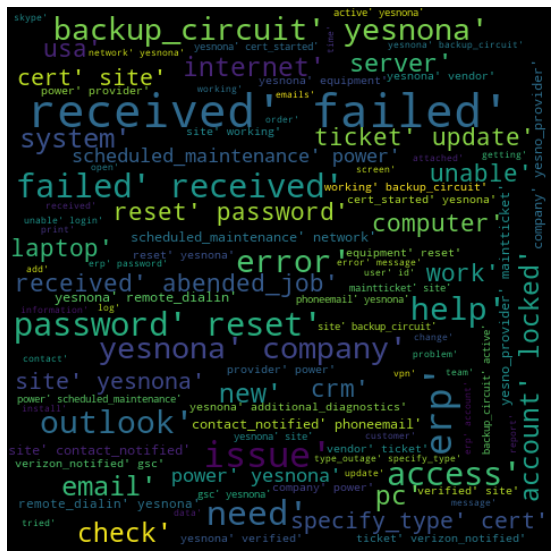

In [206]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [207]:
new_df = df_bk.copy()
new_df['words'] = data_words_bigrams
new_df

,Short description,Caller,Assignment group,English_Description,cleaned_description,number_of_words,words
0,login issue,spxjnwir pjlcoqds,GRP_0,verified user detailsemployee manager name_x00...,verified user detailsemployee manager user ad ...,16,"[verified, user, detailsemployee_manager, user..."
1,outlook,hmjdrvpb komuaywn,GRP_0,_x000D__x000D_received from hmjdrvpbkomuaywngm...,meetingsskype meetings etc appearing outlook ...,13,"[meetingsskype, meetings, etc, appearing, outl..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,_x000D__x000D_received from eylqgodmybqkwiamgm...,log,4,[log]
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable access page,4,"[unable, access, page]"
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,2,"[skype, error]"
...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua,GRP_29,_x000D__x000D_received from avglmrtsvhqmtiuagm...,receiving emails sent zz,9,"[receiving, emails, sent, zz]"
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,issue,2,[issue]
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2 windows password reset for tifpdchb pedxruyf,windows password reset tifpdchb pedxruyf,6,"[windows, password, reset, tifpdchb, pedxruyf]"
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,Others,i am unable to access the machine utilities to...,unable access macne utilities finish drawers a...,9,"[unable, access, macne, utilities, finish, dra..."


In [208]:
new_df['word_count']=new_df['cleaned_description'].apply(lambda x:len(str(x).split()))
new_df['char_counts']=new_df['cleaned_description'].apply(lambda x: char_counts(str(x)))
new_df['Digits_count']=new_df['cleaned_description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
new_df['Avg_word_Count']=new_df['word_count']/new_df['char_counts']

In [209]:
new_df.sample(100)

,Short description,Caller,Assignment group,English_Description,cleaned_description,number_of_words,words,word_count,char_counts,Digits_count,Avg_word_Count
140,prtgghj4k45 password reset,qcehailo wqynckxg,GRP_0,please reset hr_tool gv4536 password reset,reset password reset,5,"[reset, password, reset]",3,18,0,0.166667
7184,outlook freezing while opeyctrhbkm plvnuxmrils,hfvuzmbs vjtsakfb,GRP_0,outlook freezing while opeyctrhbkm plvnuxmrils,outlook freezing opeyctrhbkm plvnuxmrils,4,"[outlook, freezing, opeyctrhbkm, plvnuxmrils]",4,37,0,0.108108
2576,job Job_2549 failed in job_scheduler at: 10 20...,bpctwhsn kzqsbmtp,GRP_10,received from monitoring_toolcompanycom_x000D_...,received failed,7,"[received, failed]",2,14,0,0.142857
2225,HostName_221 : volume: _37data17 is over 98% s...,spxqmiry zpwgoqju,Others,HostName_221 _x000D__x000D_volume devSID_37dat...,space consumed space available space consumed...,18,"[space_consumed, space_available, space_consum...",9,55,0,0.163636
5068,freigabe auf ordner fÃ¼r ytcxjzue guplftok (kr...,lzpuyrvw zkxbacvn,Others,unter departments HostName_579 m unter infofre...,unter departments m unter infofreigabe ordner ...,11,"[unter, departments, unter, infofreigabe, ordn...",10,70,0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...
1391,generirtc information,rbozivdq gmlhrtvp,GRP_0,generirtc information,generirtc information,2,"[generirtc, information]",2,20,0,0.100000
3335,job Job_1343 failed in job_scheduler at: 09 07...,bpctwhsn kzqsbmtp,GRP_9,received from monitoring_toolcompanycom_x000D_...,received failed,7,"[received, failed]",2,14,0,0.142857
2759,india plant - india (): node company-ap-ind-kk...,jyoqwxhz clhxsoqy,GRP_8,india plant india node companyapindkkc2960sacc...,india plant india node downnode located india ...,16,"[india, plant, india, node, downnode, located,...",10,67,0,0.149254
274,windows account locked,kiqrvwat gwkpxzyt,GRP_0,windows account locked,windows account locked,3,"[windows, account, locked]",3,20,0,0.150000


# Ends Here

In [79]:
# Creating a function for wordcloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

In [77]:
#pip install plotly cufflinks
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [78]:
df['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution- Histogram (Fig-1)')

PlotlyRequestError: Authentication credentials were not provided.

In [ ]:

#pip install chart_studio

In [93]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

sr = stopwords.words('english')
for i,text in enumerate(df['Description']):
  df['Description'][i]=" ".join(word for word in text.split(' ') if word not in sr)


import spacy
import en_core_web_sm

spacy.prefer_gpu()
nlp = en_core_web_sm.load()

#nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

df['Description'] = df['Description'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


ModuleNotFoundError: No module named 'en_core_web_sm'

In [2]:
import spacy
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])
# Take an example of row# 43 Description and lemmatize it


OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.